# DIABETES PREDICTION


# Comparing Binary classification,Decision Tree, Random forest,KNN and Naive baye's algorithm

In [3]:
#Importing all the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
#loading the dataset
df=pd.read_csv("C:/Users/jasleen kaur/OneDrive/Desktop/DS_ML/diabetes pred.csv")
df

,age,hypertension,heart_disease,bmi,hb_level,blood_glucose_level,diabetes
0,0.08,0,0,14.43,6.5,160,not diabetic
1,0.08,0,0,13.35,3.5,145,not diabetic
2,0.08,0,0,12.80,6.6,80,not diabetic
3,0.08,0,0,11.88,5.7,80,not diabetic
4,0.08,0,0,27.32,6.1,126,not diabetic
...,...,...,...,...,...,...,...
99995,135.00,0,0,18.42,6.2,126,not diabetic
99996,136.00,0,0,20.80,5.0,126,not diabetic
99997,137.00,0,0,18.31,5.7,85,not diabetic
99998,138.00,0,0,16.59,5.0,100,not diabetic


## Step1: ANALYSIS OF DATA-

In [6]:
#shape of the data
df.shape

(100000, 7)

In [7]:
#size of the data
df.size

700000

In [8]:
#number of rows in each column
df.count()

age                    100000
hypertension           100000
heart_disease          100000
bmi                    100000
hb_level               100000
blood_glucose_level    100000
diabetes               100000
dtype: int64

In [9]:
#description of statistical functions
df.describe()

,age,hypertension,heart_disease,bmi,hb_level,blood_glucose_level
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.964726,0.07485,0.039420,27.320767,5.527507,138.058060
std,22.555449,0.26315,0.194593,6.636783,1.070672,40.708136
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000
max,139.000000,1.00000,1.000000,95.690000,9.000000,300.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  float64
 1   hypertension         100000 non-null  int64  
 2   heart_disease        100000 non-null  int64  
 3   bmi                  100000 non-null  float64
 4   hb_level             100000 non-null  float64
 5   blood_glucose_level  100000 non-null  int64  
 6   diabetes             100000 non-null  object 
dtypes: float64(3), int64(3), object(1)
memory usage: 5.3+ MB


In [11]:
#Top 5 columns
df.head()

,age,hypertension,heart_disease,bmi,hb_level,blood_glucose_level,diabetes
0,0.08,0,0,14.43,6.5,160,not diabetic
1,0.08,0,0,13.35,3.5,145,not diabetic
2,0.08,0,0,12.80,6.6,80,not diabetic
3,0.08,0,0,11.88,5.7,80,not diabetic
4,0.08,0,0,27.32,6.1,126,not diabetic


In [12]:
#Bottom 5 columns
df.tail()

,age,hypertension,heart_disease,bmi,hb_level,blood_glucose_level,diabetes
99995,135.0,0,0,18.42,6.2,126,not diabetic
99996,136.0,0,0,20.80,5.0,126,not diabetic
99997,137.0,0,0,18.31,5.7,85,not diabetic
99998,138.0,0,0,16.59,5.0,100,not diabetic
99999,139.0,0,0,19.26,6.0,155,not diabetic


## Step 2: MAPPING OF CATEGORICAL DATA-

In [14]:
#finding unique values in categorical data:
df['diabetes'].unique()

array(['not diabetic', 'diabetic'], dtype=object)

In [15]:
#Mapping of categorical values to numeric by using map function:
df['diabetes']=df['diabetes'].map({'not diabetic':0,'diabetic':1})

In [16]:
df #values of diabetes columns are changes to binary(0 and 1)

,age,hypertension,heart_disease,bmi,hb_level,blood_glucose_level,diabetes
0,0.08,0,0,14.43,6.5,160,0
1,0.08,0,0,13.35,3.5,145,0
2,0.08,0,0,12.80,6.6,80,0
3,0.08,0,0,11.88,5.7,80,0
4,0.08,0,0,27.32,6.1,126,0
...,...,...,...,...,...,...,...
99995,135.00,0,0,18.42,6.2,126,0
99996,136.00,0,0,20.80,5.0,126,0
99997,137.00,0,0,18.31,5.7,85,0
99998,138.00,0,0,16.59,5.0,100,0


## Step 3: FINDING NULL AND DUPLICATED VALUES


In [18]:
#finding sum of null values in each column
df.isnull().sum()

age                    0
hypertension           0
heart_disease          0
bmi                    0
hb_level               0
blood_glucose_level    0
diabetes               0
dtype: int64

#### so, there are no null values

In [20]:
#finding duplicated values in each column
df.duplicated().sum()

12912

#### so, there are 12,912 duplicated values

#### Dropping duplicated values

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df

,age,hypertension,heart_disease,bmi,hb_level,blood_glucose_level,diabetes
0,0.08,0,0,14.43,6.5,160,0
1,0.08,0,0,13.35,3.5,145,0
2,0.08,0,0,12.80,6.6,80,0
3,0.08,0,0,11.88,5.7,80,0
4,0.08,0,0,27.32,6.1,126,0
...,...,...,...,...,...,...,...
99995,135.00,0,0,18.42,6.2,126,0
99996,136.00,0,0,20.80,5.0,126,0
99997,137.00,0,0,18.31,5.7,85,0
99998,138.00,0,0,16.59,5.0,100,0


#### Resetting the index after dropping duplicates

In [26]:
df=df.reset_index()
df.drop(columns=['index'],inplace=True)

In [27]:
df

,age,hypertension,heart_disease,bmi,hb_level,blood_glucose_level,diabetes
0,0.08,0,0,14.43,6.5,160,0
1,0.08,0,0,13.35,3.5,145,0
2,0.08,0,0,12.80,6.6,80,0
3,0.08,0,0,11.88,5.7,80,0
4,0.08,0,0,27.32,6.1,126,0
...,...,...,...,...,...,...,...
87083,135.00,0,0,18.42,6.2,126,0
87084,136.00,0,0,20.80,5.0,126,0
87085,137.00,0,0,18.31,5.7,85,0
87086,138.00,0,0,16.59,5.0,100,0


## Step 4: OUTLIER DETECTION-

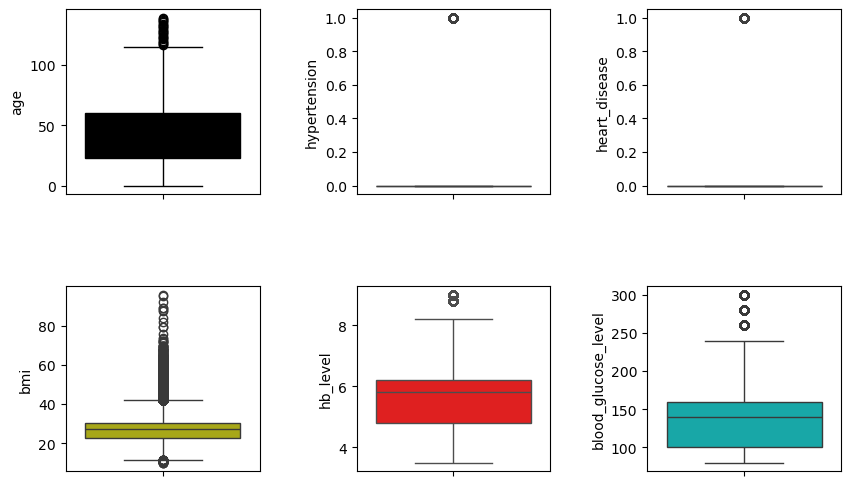

In [29]:
fig=plt.figure(figsize=(10,6))
#1 graph
ax=plt.subplot(231)
ax=sns.boxplot(y='age',color='k',data=df)
ax.set_ylabel('age')

#2 graph
ax1=plt.subplot(232)
ax1=sns.boxplot(y='hypertension',data=df)
ax1.set_ylabel('hypertension')

#3 graph
ax2=plt.subplot(233)
ax2=sns.boxplot(y='heart_disease',data=df)
ax2.set_ylabel('heart_disease')

#4 graph
ax3=plt.subplot(234)
ax3=sns.boxplot(y='bmi',color='y',data=df)
ax3.set_ylabel('bmi')

#5 graph
ax4=plt.subplot(235)
ax4=sns.boxplot(y='hb_level',color='r',data=df)
ax4.set_ylabel('hb_level')

#6 graph
ax5=plt.subplot(236)
ax5=sns.boxplot(y='blood_glucose_level',color='c',data=df)
ax5.set_ylabel('blood_glucose_level')
##for spacing between the graphs
plt.subplots_adjust(wspace=0.5,hspace=0.5)
#for showing the graphs
plt.show()

#### so, 'bmi' and 'age' have maximum outliers

### Removing outliers by IQR Method

In [32]:
#finding the interquartile range of the column
q1=df['bmi'].quantile(0.25)
q3=df['bmi'].quantile(0.75)
iqr=q3-q1
print('First Quartile is:',q1)
print('Third Quartile is:',q3)
print('Inter Quartile Range is:',iqr)

#diving the column in two halves
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
print('Upper limit is:',upper_limit)
print('Lower limit is:',lower_limit)

First Quartile is: 22.86
Third Quartile is: 30.51
Inter Quartile Range is: 7.650000000000002
Upper limit is: 41.98500000000001
Lower limit is: 11.384999999999996


In [33]:
#filtering or removing the outliers from that column
df1= df[(df['bmi']>= lower_limit) & (df['bmi']<= upper_limit)]
df1

,age,hypertension,heart_disease,bmi,hb_level,blood_glucose_level,diabetes
0,0.08,0,0,14.43,6.5,160,0
1,0.08,0,0,13.35,3.5,145,0
2,0.08,0,0,12.80,6.6,80,0
3,0.08,0,0,11.88,5.7,80,0
4,0.08,0,0,27.32,6.1,126,0
...,...,...,...,...,...,...,...
87083,135.00,0,0,18.42,6.2,126,0
87084,136.00,0,0,20.80,5.0,126,0
87085,137.00,0,0,18.31,5.7,85,0
87086,138.00,0,0,16.59,5.0,100,0


#### As some rows are deleted so, resetting the index

In [35]:
df1=df1.reset_index()
df1.drop(columns=['index'],inplace=True)

In [36]:
df1 

,age,hypertension,heart_disease,bmi,hb_level,blood_glucose_level,diabetes
0,0.08,0,0,14.43,6.5,160,0
1,0.08,0,0,13.35,3.5,145,0
2,0.08,0,0,12.80,6.6,80,0
3,0.08,0,0,11.88,5.7,80,0
4,0.08,0,0,27.32,6.1,126,0
...,...,...,...,...,...,...,...
83765,135.00,0,0,18.42,6.2,126,0
83766,136.00,0,0,20.80,5.0,126,0
83767,137.00,0,0,18.31,5.7,85,0
83768,138.00,0,0,16.59,5.0,100,0


#### Outliers removes from 'bmi'...

In [38]:
#finding the interquartile range of the column
q1=df['age'].quantile(0.25)
q3=df['age'].quantile(0.75)
iqr=q3-q1
print('First Quartile is:',q1)
print('Third Quartile is:',q3)
print('Inter Quartile Range is:',iqr)

#diving the column in two halves
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
print('Upper limit is:',upper_limit)
print('Lower limit is:',lower_limit)

First Quartile is: 23.0
Third Quartile is: 60.0
Inter Quartile Range is: 37.0
Upper limit is: 115.5
Lower limit is: -32.5


In [39]:
#filtering or removing the outliers from that column
df2= df1[(df1['age']>= lower_limit) & (df1['age']<= upper_limit)]
df2

,age,hypertension,heart_disease,bmi,hb_level,blood_glucose_level,diabetes
0,0.08,0,0,14.43,6.5,160,0
1,0.08,0,0,13.35,3.5,145,0
2,0.08,0,0,12.80,6.6,80,0
3,0.08,0,0,11.88,5.7,80,0
4,0.08,0,0,27.32,6.1,126,0
...,...,...,...,...,...,...,...
83741,111.00,0,0,14.25,4.0,159,0
83742,112.00,0,0,19.71,4.8,158,0
83743,113.00,0,0,21.01,6.2,140,0
83744,114.00,0,0,15.82,5.0,85,0


#### As, some rows are deleted so, resetting the index:

In [41]:
df2=df2.reset_index()
df2.drop(columns=['index'],inplace=True)

In [42]:
df2

,age,hypertension,heart_disease,bmi,hb_level,blood_glucose_level,diabetes
0,0.08,0,0,14.43,6.5,160,0
1,0.08,0,0,13.35,3.5,145,0
2,0.08,0,0,12.80,6.6,80,0
3,0.08,0,0,11.88,5.7,80,0
4,0.08,0,0,27.32,6.1,126,0
...,...,...,...,...,...,...,...
83741,111.00,0,0,14.25,4.0,159,0
83742,112.00,0,0,19.71,4.8,158,0
83743,113.00,0,0,21.01,6.2,140,0
83744,114.00,0,0,15.82,5.0,85,0


### Removed outliers from major columns-

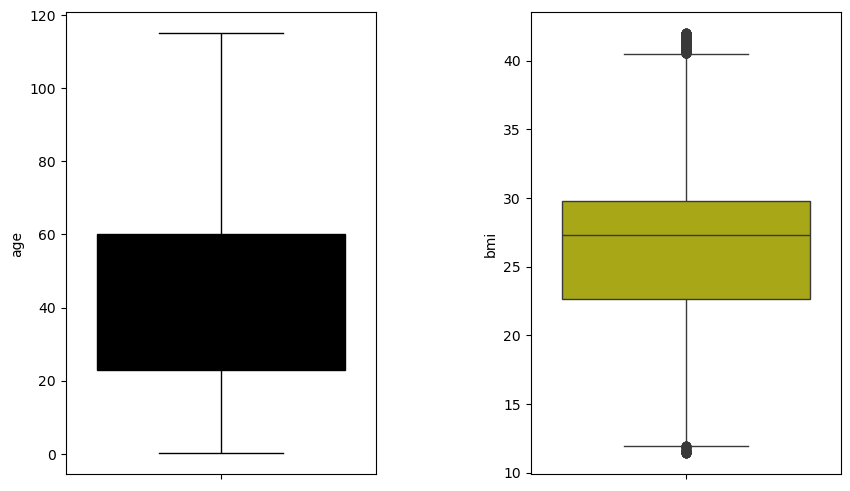

In [44]:
fig=plt.figure(figsize=(10,6))
#1 graph
ax=plt.subplot(121)
ax=sns.boxplot(y='age',color='k',data=df2)
ax.set_ylabel('age')

#2 graph
ax1=plt.subplot(122)
ax1=sns.boxplot(y='bmi',color='y',data=df2)
ax1.set_ylabel('bmi')

##for spacing between the graphs
plt.subplots_adjust(wspace=0.5,hspace=0.5)
#for showing the graphs
plt.show()

## Step 5: VISUALIZATION OF DATA-

### Scatterplots

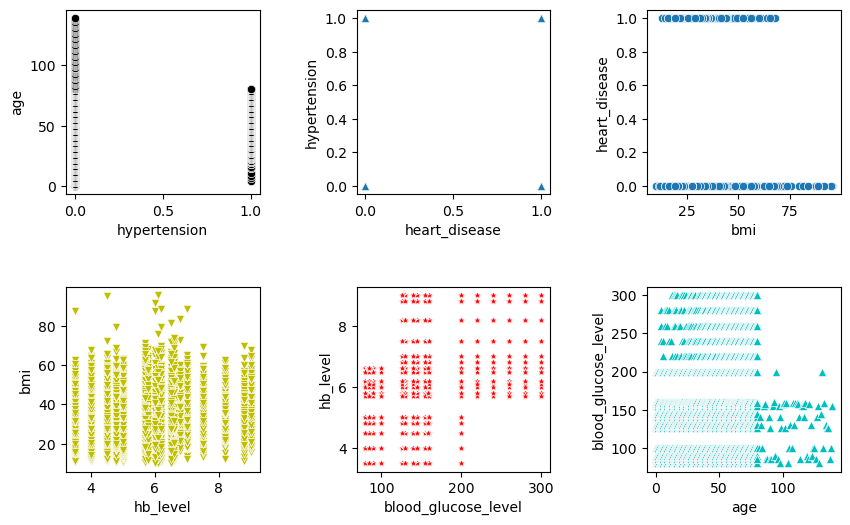

In [47]:
fig=plt.figure(figsize=(10,6))
#1 graph
ax=plt.subplot(231)
ax=sns.scatterplot(y='age',x='hypertension',color='k',data=df)
ax.set_ylabel('age')
ax.set_xlabel('hypertension')
#2 graph
ax1=plt.subplot(232)
ax1=sns.scatterplot(y='hypertension',x='heart_disease',marker='^',data=df)
ax1.set_ylabel('hypertension')
ax1.set_xlabel('heart_disease')
#3 graph
ax2=plt.subplot(233)
ax2=sns.scatterplot(y='heart_disease',x='bmi',marker='o',data=df)
ax2.set_ylabel('heart_disease')
ax2.set_xlabel('bmi')
#4 graph
ax3=plt.subplot(234)
ax3=sns.scatterplot(y='bmi',x='hb_level',marker='v',color='y',data=df)
ax3.set_ylabel('bmi')
ax3.set_xlabel('hb_level')
#5 graph
ax4=plt.subplot(235)
ax4=sns.scatterplot(y='hb_level',x='blood_glucose_level',marker='*',color='r',data=df)
ax4.set_ylabel('hb_level')
ax4.set_xlabel('blood_glucose_level')
#6 graph
ax5=plt.subplot(236)
ax5=sns.scatterplot(y='blood_glucose_level',x='age',marker='^',color='c',data=df)
ax5.set_ylabel('blood_glucose_level')
ax5.set_xlabel('age')
##for spacing between the graphs
plt.subplots_adjust(wspace=0.5,hspace=0.5)
#for showing the graphs
plt.show()

### Regression plot

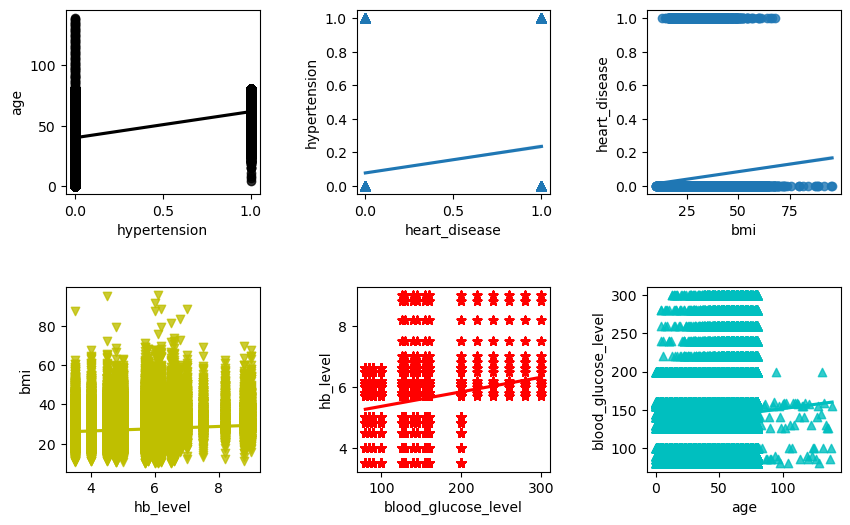

In [49]:
fig=plt.figure(figsize=(10,6))
#1 graph
ax=plt.subplot(231)
ax=sns.regplot(y='age',x='hypertension',color='k',data=df)
ax.set_ylabel('age')
ax.set_xlabel('hypertension')
#2 graph
ax1=plt.subplot(232)
ax1=sns.regplot(y='hypertension',x='heart_disease',marker='^',data=df)
ax1.set_ylabel('hypertension')
ax1.set_xlabel('heart_disease')
#3 graph
ax2=plt.subplot(233)
ax2=sns.regplot(y='heart_disease',x='bmi',marker='o',data=df)
ax2.set_ylabel('heart_disease')
ax2.set_xlabel('bmi')
#4 graph
ax3=plt.subplot(234)
ax3=sns.regplot(y='bmi',x='hb_level',marker='v',color='y',data=df)
ax3.set_ylabel('bmi')
ax3.set_xlabel('hb_level')
#5 graph
ax4=plt.subplot(235)
ax4=sns.regplot(y='hb_level',x='blood_glucose_level',marker='*',color='r',data=df)
ax4.set_ylabel('hb_level')
ax4.set_xlabel('blood_glucose_level')
#6 graph
ax5=plt.subplot(236)
ax5=sns.regplot(y='blood_glucose_level',x='age',marker='^',color='c',data=df)
ax5.set_ylabel('blood_glucose_level')
ax5.set_xlabel('age')
##for spacing between the graphs
plt.subplots_adjust(wspace=0.5,hspace=0.5)
#for showing the graphs
plt.show()

### pair plot

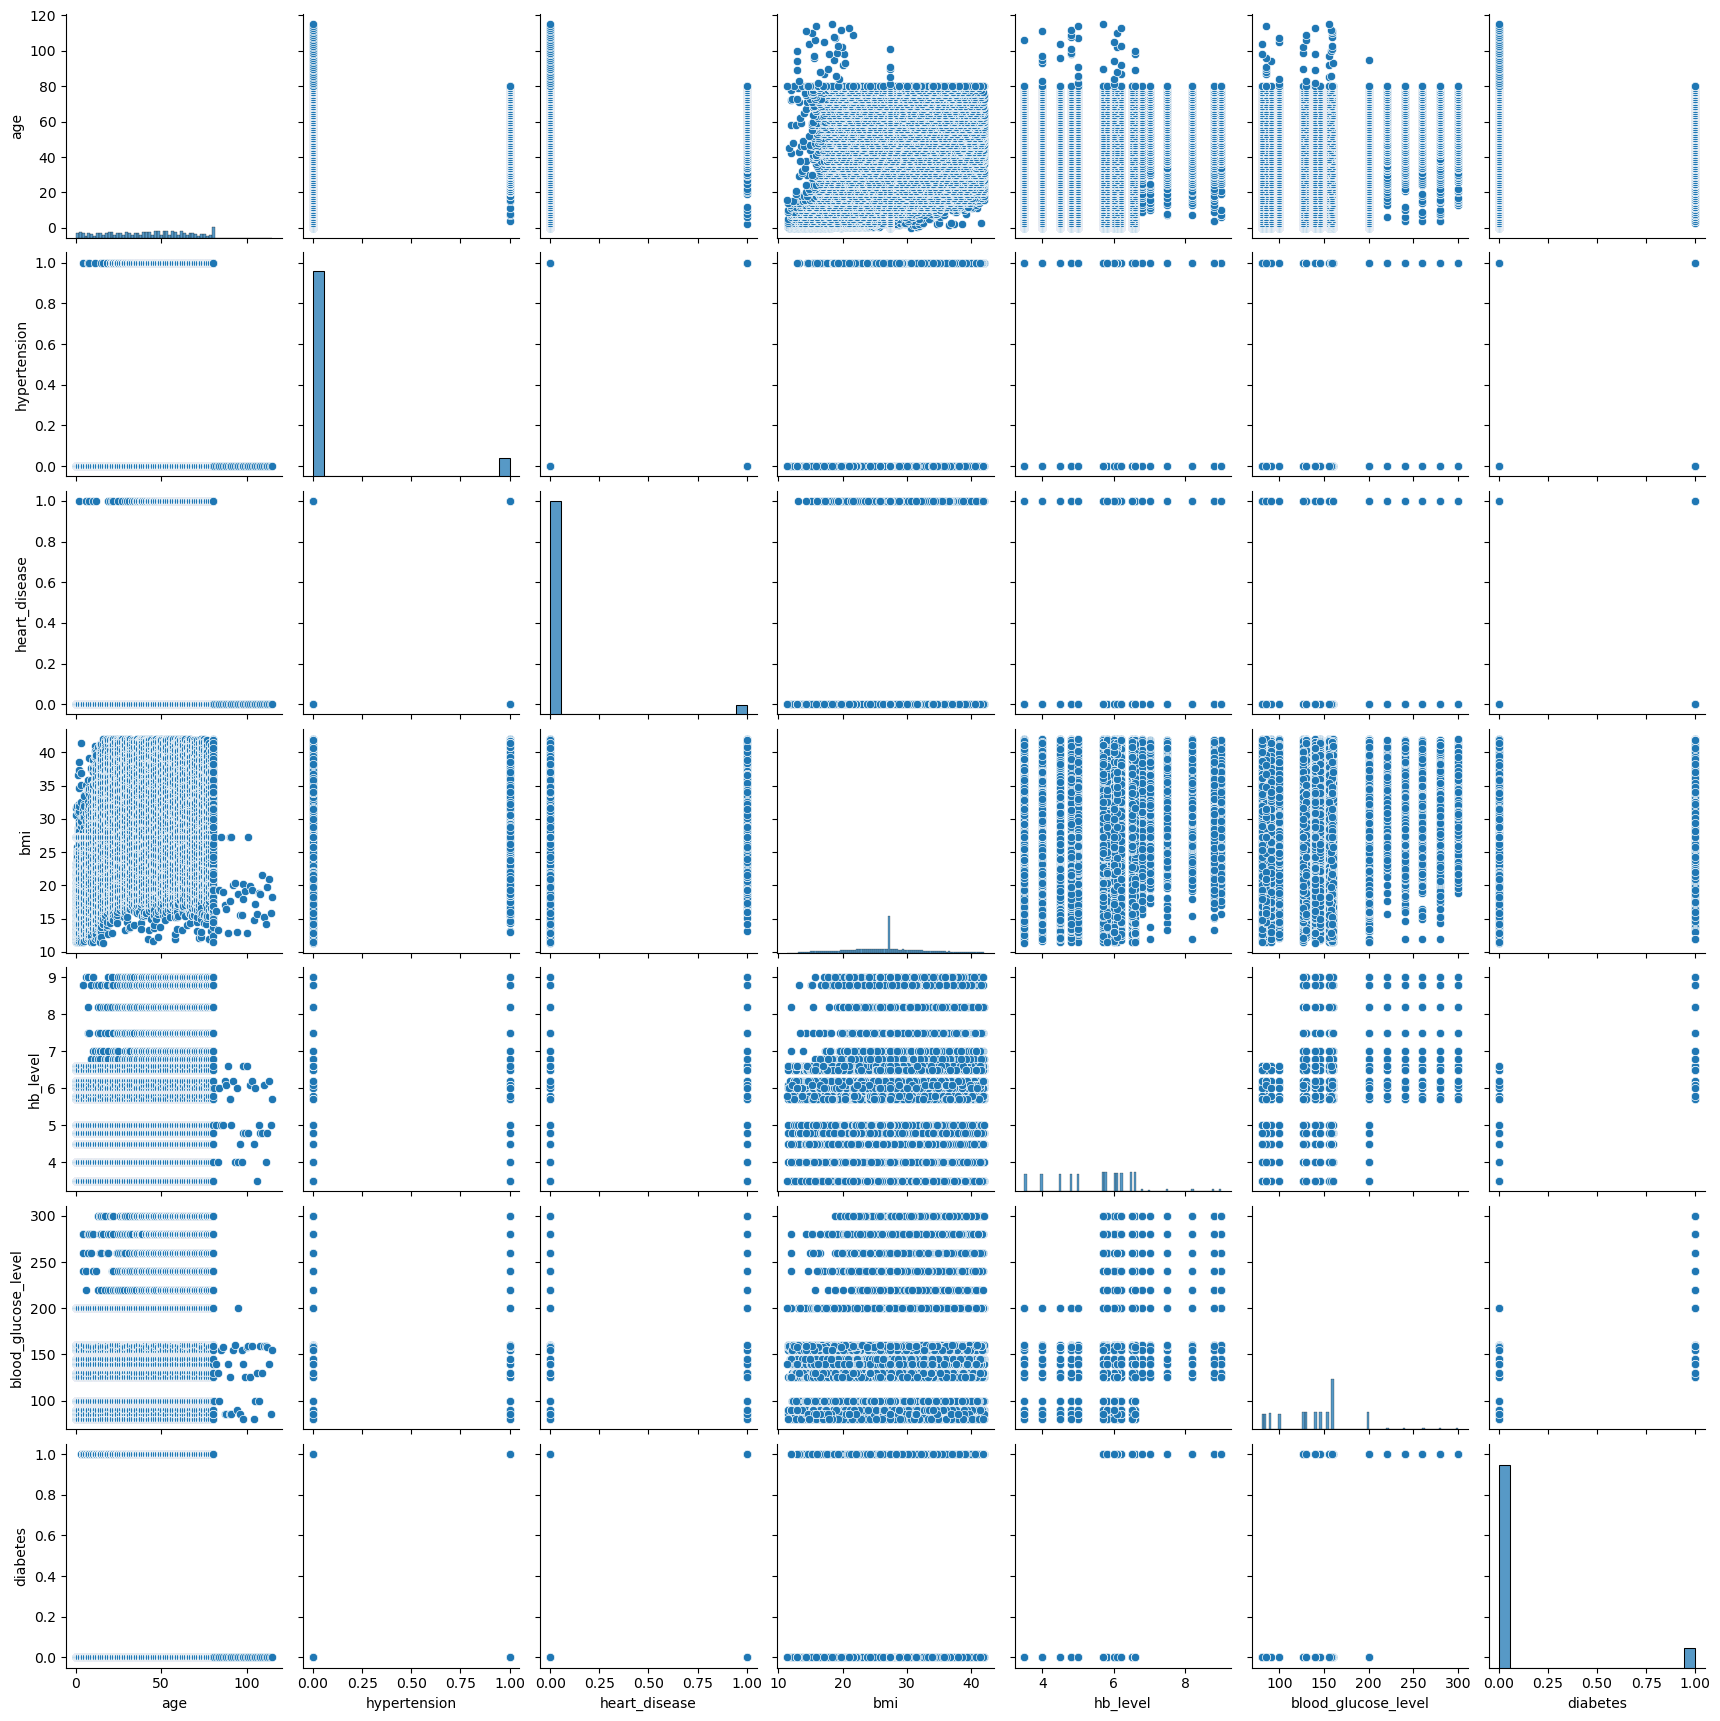

In [51]:
sns.pairplot(df2)

### Heatmap

<Axes: >

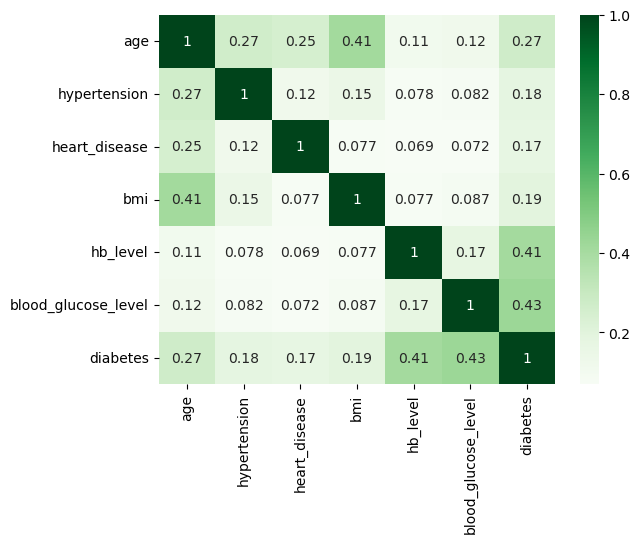

In [53]:
sns.heatmap(df2.corr(),cmap='Greens',annot=True)

## Step 6: SPLIT INDEPENDENT AND DEPENDENT VARIABLES-

In [55]:
x=df2.iloc[:,0:6]  #independent variables
y=df2.iloc[:,-1]   #dependent variables
print(x)
print(y)

          age  hypertension  heart_disease    bmi  hb_level  \
0        0.08             0              0  14.43       6.5   
1        0.08             0              0  13.35       3.5   
2        0.08             0              0  12.80       6.6   
3        0.08             0              0  11.88       5.7   
4        0.08             0              0  27.32       6.1   
...       ...           ...            ...    ...       ...   
83741  111.00             0              0  14.25       4.0   
83742  112.00             0              0  19.71       4.8   
83743  113.00             0              0  21.01       6.2   
83744  114.00             0              0  15.82       5.0   
83745  115.00             0              0  18.30       5.7   

       blood_glucose_level  
0                      160  
1                      145  
2                       80  
3                       80  
4                      126  
...                    ...  
83741                  159  
83742      

## Step 7: TRAIN, TEST AND SPLIT THE MODEL

In [57]:
#diving the data into 80:20 train-test ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=42)
x_train

,age,hypertension,heart_disease,bmi,hb_level,blood_glucose_level
13215,15.00,0,0,18.31,6.0,130
33207,35.00,0,0,20.82,4.8,126
5859,6.00,0,0,20.01,6.0,158
33391,35.00,0,0,34.45,3.5,100
38603,40.00,0,0,37.39,6.0,158
...,...,...,...,...,...,...
6265,6.00,0,0,15.92,6.1,200
54886,53.00,0,0,27.32,6.5,145
76820,75.00,0,0,30.64,6.1,85
860,0.88,0,0,17.26,5.7,140


In [58]:
y_train

13215    0
33207    0
5859     0
33391    0
38603    0
        ..
6265     0
54886    0
76820    0
860      0
15795    0
Name: diabetes, Length: 66996, dtype: int64

In [59]:
x_test

,age,hypertension,heart_disease,bmi,hb_level,blood_glucose_level
50722,50.0,0,0,27.32,6.6,158
17761,19.0,0,0,29.49,5.8,160
23788,25.0,0,0,25.90,6.6,155
62557,60.0,0,0,27.32,6.2,100
10055,11.0,0,0,15.09,3.5,160
...,...,...,...,...,...,...
31137,33.0,0,0,32.77,5.0,80
35822,37.0,0,0,21.31,4.0,145
48453,48.0,0,0,20.66,4.8,90
12590,14.0,0,0,22.98,6.6,100


In [60]:
y_test

50722    0
17761    0
23788    0
62557    0
10055    0
        ..
31137    0
35822    0
48453    0
12590    0
17030    0
Name: diabetes, Length: 16750, dtype: int64

## Step 8: Building models-

# Comparison between algorithms-

### 1. Binary classification model using logistic regression

In [64]:
#importing libraries 
from sklearn.linear_model import LogisticRegression

#building a model named as classifier
classifier = LogisticRegression()
print(classifier)

#parameters for validating accuracy
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1','l2','elasticnet'],
             'C':[1,2,3,4,5,10,20,30,40,50],
             'max_iter': [100,200,300]}

classifier = GridSearchCV(classifier,param_grid = parameter,scoring='accuracy',verbose=True,cv=5)

#fitting the model and balancing-
classifier.fit(x_train,y_train)



LogisticRegression()
Fitting 5 folds for each of 90 candidates, totalling 450 fits


C:\Users\Ankita\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ankita\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy', verbose=True)

In [65]:
#best parameters
print('Best parameters:\n',classifier.best_params_,'\n')
print('Best Score:\n',classifier.best_score_,'\n')

#prediction 
y_pred = classifier.predict(x_test)
print(y_pred)

Best parameters:
 {'C': 4, 'max_iter': 100, 'penalty': 'l2'} 

Best Score:
 0.9579676462823578 

[0 0 0 ... 0 0 0]


In [66]:
#importing libraries
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score

#scores
acc_score_c = accuracy_score(y_pred,y_test)
recall_scr_c = recall_score(y_pred,y_test)
pre_scr_c = precision_score(y_pred,y_test)
f1_scr_c = f1_score(y_pred,y_test)
class_report_c = classification_report(y_pred,y_test)
print('Accuracy score is:\n',acc_score_c,'\n')
print('Recall score is:\n',recall_scr_c,'\n')
print('precision score is:\n',pre_scr_c,'\n')
print('f1 score is:\n',f1_scr_c,'\n')
print('Classification report is:\n',class_report_c)

Accuracy score is:
 0.9592238805970149 

Recall score is:
 0.8712328767123287 

precision score is:
 0.6377005347593583 

f1 score is:
 0.7363952142030105 

Classification report is:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     15655
           1       0.64      0.87      0.74      1095

    accuracy                           0.96     16750
   macro avg       0.81      0.92      0.86     16750
weighted avg       0.97      0.96      0.96     16750



### Prediction from Logistic Regression:

In [68]:
lr_prediction=classifier.predict([[135.00,0,0,18.42,6.2,126]])

C:\Users\Ankita\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### 2. Using Decision Tree Algorithm

In [70]:
#importing libraries 
from sklearn.tree import DecisionTreeClassifier
# Define a smaller parameter grid
parameter_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best'],
    'max_depth': [2, 3, 4],
    'max_features': ['sqrt', 'log2'],
    'ccp_alpha': [0, 1, 2]
}

# Initialize the Decision Tree Classifier
treemodel = DecisionTreeClassifier()

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=treemodel, param_grid=parameter_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Make predictions on the test set
y_pred = grid_search.predict(x_test)



In [71]:
# calculating score:
#importing libraries
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score

#scores
acc_score_dt = accuracy_score(y_pred,y_test)
recall_scr_dt = recall_score(y_pred,y_test)
pre_scr_dt = precision_score(y_pred,y_test)
f1_scr_dt = f1_score(y_pred,y_test)
class_report_dt = classification_report(y_pred,y_test)
print('Accuracy score is:\n',acc_score_dt,'\n')
print('Recall score is:\n',recall_scr_dt,'\n')
print('precision score is:\n',pre_scr_dt,'\n')
print('f1 score is:\n',f1_scr_dt,'\n')
print('Classification report is:\n',class_report_dt)

Accuracy score is:
 0.9666865671641791 

Recall score is:
 1.0 

precision score is:
 0.6270053475935828 

f1 score is:
 0.770747740345111 

Classification report is:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     15812
           1       0.63      1.00      0.77       938

    accuracy                           0.97     16750
   macro avg       0.81      0.98      0.88     16750
weighted avg       0.98      0.97      0.97     16750



### Prediction from Decision Tree:

In [73]:
dt_prediction=grid_search.predict([[135.00,0,0,18.42,6.2,126]])

C:\Users\Ankita\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### 3. Using Random Forest Algorithm

In [75]:
#model building 
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
print(randomforest)

# parameters
parameter={'max_depth':[2,3,4,5],
          'bootstrap':[True,False],
          'max_features':['auto','sqrt','log2',None],
          'criterion':['gini','entropy']}

from sklearn.model_selection import GridSearchCV
treemodel=RandomForestClassifier()
cv=GridSearchCV(randomforest,param_grid=parameter,cv=5,
               n_jobs=5)

#fitting and balancing-
cv.fit(x_train,y_train)



RandomForestClassifier(random_state=42)


C:\Users\Ankita\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ankita\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ankita\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Ankita\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_con

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=5,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2', None]})

In [76]:
#best parameters
print('Best parameters:\n',cv.best_params_,'\n')
print('Best Score:\n',cv.best_score_,'\n')

#prediction 
y_pred = cv.predict(x_test)
print(y_pred)

Best parameters:
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': None} 

Best Score:
 0.9704012150606027 

[0 0 0 ... 0 0 0]


In [77]:
# calculating score:
#importing libraries
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score

#scores
acc_score_rf = accuracy_score(y_pred,y_test)
recall_scr_rf = recall_score(y_pred,y_test)
pre_scr_rf = precision_score(y_pred,y_test)
f1_scr_rf = f1_score(y_pred,y_test)
class_report = classification_report(y_pred,y_test)
print('Accuracy score is:\n',acc_score_rf,'\n')
print('Recall score is:\n',recall_scr_rf,'\n')
print('precision score is:\n',pre_scr_rf,'\n')
print('f1 score is:\n',f1_scr_rf,'\n')
print('Classification report is:\n',class_report)

Accuracy score is:
 0.9705074626865672 

Recall score is:
 1.0 

precision score is:
 0.6697860962566845 

f1 score is:
 0.8022417934347478 

Classification report is:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     15748
           1       0.67      1.00      0.80      1002

    accuracy                           0.97     16750
   macro avg       0.83      0.98      0.89     16750
weighted avg       0.98      0.97      0.97     16750



### Prediction from Random Forest:

In [79]:
rf_prediction=cv.predict([[135.00,0,0,18.42,6.2,126]])

C:\Users\Ankita\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### 4.  Using KNN (K NEAREST NEIGHBOUR) Algorithm

In [81]:
#model building 
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

#fittin the model
knn.fit(x_train,y_train)

#prediction
y_pred=knn.predict(x_test)

In [82]:
# calculating score:
#importing libraries
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score

#scores
acc_score_knn = accuracy_score(y_pred,y_test)
recall_scr_knn = recall_score(y_pred,y_test)
pre_scr_knn = precision_score(y_pred,y_test)
f1_scr_knn = f1_score(y_pred,y_test)
class_report = classification_report(y_pred,y_test)
print('Accuracy score is:\n',acc_score_knn,'\n')
print('Recall score is:\n',recall_scr_knn,'\n')
print('precision score is:\n',pre_scr_knn,'\n')
print('f1 score is:\n',f1_scr_knn,'\n')
print('Classification report is:\n',class_report)

Accuracy score is:
 0.954089552238806 

Recall score is:
 0.8871139510117146 

precision score is:
 0.5568181818181818 

f1 score is:
 0.6841889117043121 

Classification report is:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98     15811
           1       0.56      0.89      0.68       939

    accuracy                           0.95     16750
   macro avg       0.77      0.92      0.83     16750
weighted avg       0.97      0.95      0.96     16750



### Prediction from KNN:

In [84]:
knn_prediction=knn.predict([[135.00,0,0,18.42,6.2,126]])

C:\Users\Ankita\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### 5. Using Naive Baye's Algorithm

In [86]:
#importing libraries
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

#fitting-
gnb.fit(x_train, y_train)
#predicting
y_pred=gnb.predict(x_test)


In [87]:
# calculating score:
#importing libraries
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score

#scores
acc_score_gnb = accuracy_score(y_pred,y_test)
recall_scr_gnb = recall_score(y_pred,y_test)
pre_scr_gnb = precision_score(y_pred,y_test)
f1_scr_gnb = f1_score(y_pred,y_test)
class_report = classification_report(y_pred,y_test)
print('Accuracy score is:\n',acc_score_gnb,'\n')
print('Recall score is:\n',recall_scr_gnb,'\n')
print('precision score is:\n',pre_scr_gnb,'\n')
print('f1 score is:\n',f1_scr_gnb,'\n')
print('Classification report is:\n',class_report)

Accuracy score is:
 0.9007761194029851 

Recall score is:
 0.46084905660377357 

precision score is:
 0.6530748663101604 

f1 score is:
 0.5403761061946902 

Classification report is:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94     14630
           1       0.65      0.46      0.54      2120

    accuracy                           0.90     16750
   macro avg       0.79      0.71      0.74     16750
weighted avg       0.89      0.90      0.89     16750



### Prediction from Naive Baye's

In [89]:
gnb_prediction=gnb.predict([[135.00,0,0,18.42,6.2,126]])

C:\Users\Ankita\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# svm

In [91]:
#importing libraries
from sklearn.svm import SVC
svm = SVC()

#fitting-
svm.fit(x_train, y_train)
#predicting
y_pred=svm.predict(x_test)


In [92]:
# Importing libraries
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Scores
acc_score_svm = accuracy_score(y_test, y_pred)
recall_scr_svm = recall_score(y_test, y_pred, average='macro')
pre_scr_svm = precision_score(y_test, y_pred, average='macro')
f1_scr_svm = f1_score(y_test, y_pred, average='macro')

print('Accuracy score is:\n', acc_score_svm, '\n')
print('Recall score is:\n', recall_scr_svm, '\n')
print('Precision score is:\n', pre_scr_svm, '\n')
print('F1 score is:\n', f1_scr_svm, '\n')




Accuracy score is:
 0.9456716417910448 

Recall score is:
 0.695855614973262 

Precision score is:
 0.9718510269735214 

F1 score is:
 0.7669779904921823 



### prediction

In [94]:
svm_predict= svm.predict([[135.00,0,0,18.42,6.2,126]])

C:\Users\Ankita\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [96]:
scores={'model': ['Logistic', 'Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes','SVM'],
    'Accuracy': [acc_score_c, acc_score_dt, acc_score_rf, acc_score_knn, acc_score_gnb,acc_score_svm],
    'Recall_score': [recall_scr_c, recall_scr_dt, recall_scr_rf, recall_scr_knn, recall_scr_gnb,recall_scr_svm],
    'Precision Score': [pre_scr_c, pre_scr_dt, pre_scr_rf, pre_scr_knn, pre_scr_gnb,pre_scr_svm],
    'F1 Score': [f1_scr_c, f1_scr_dt, f1_scr_rf, f1_scr_knn, f1_scr_gnb,f1_scr_svm]
}

scorecomp=pd.DataFrame(scores)
#saving file-
scorecomp.to_csv('score_comp.csv',index=False)
scorecomp

,model,Accuracy,Recall_score,Precision Score,F1 Score
0,Logistic,0.959224,0.871233,0.637701,0.736395
1,Decision Tree,0.966687,1.000000,0.627005,0.770748
2,Random Forest,0.970507,1.000000,0.669786,0.802242
3,KNN,0.954090,0.887114,0.556818,0.684189
4,Naive Bayes,0.900776,0.460849,0.653075,0.540376
5,SVM,0.945672,0.695856,0.971851,0.766978


In [102]:
p_results = {
    'Model': ['Logistic', 'Decision Tree', 'Random Forest','KNN','Naive Bayes','SVM'],
    'Predictions':[lr_prediction, dt_prediction, rf_prediction,knn_prediction ,gnb_prediction,svm_predict]
    # Fill in accuracy for applicable models
}

# Create a DataFrame from the results dictionary
p_results_df = pd.DataFrame(p_results)

# Display the DataFrame as a table
p_results_df

,Model,Predictions
0,Logistic,[0]
1,Decision Tree,[0]
2,Random Forest,[0]
3,KNN,[0]
4,Naive Bayes,[0]
5,SVM,[0]


### As in this dataset: 0:'Not Diabetic' and 1:'Diabetic''



## Pictorial representation of accuracies

           model  Accuracy
0       Logistic  0.959224
1  Decision Tree  0.966687
2  Random Forest  0.970507
3            KNN  0.954090
4    Naive Bayes  0.900776
5            SVM  0.945672


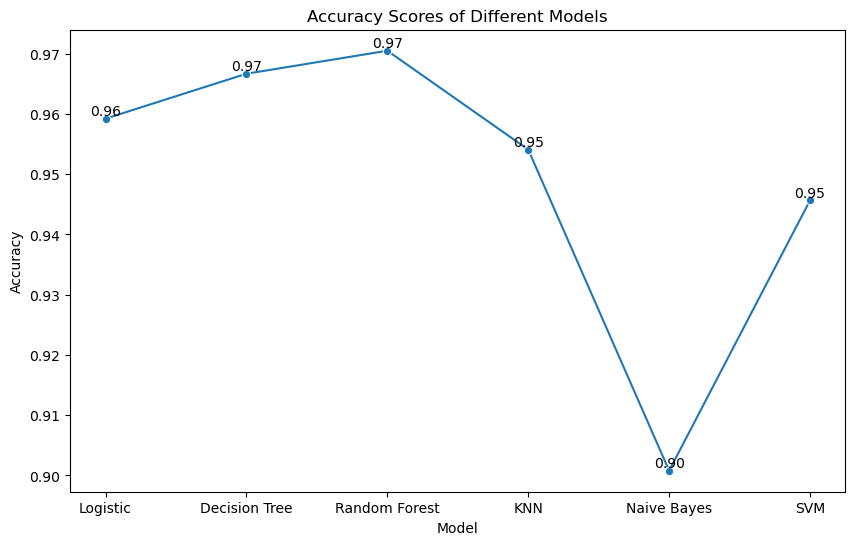

In [106]:

plot = {
    'model': ['Logistic', 'Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes','SVM'],
    'Accuracy': [acc_score_c, acc_score_dt, acc_score_rf, acc_score_knn, acc_score_gnb,acc_score_svm]
}

# Create a DataFrame
scorecomp = pd.DataFrame(plot)

# Save the DataFrame to a CSV file
scorecomp.to_csv('score_comp.csv', index=False)

# Display the DataFrame
print(scorecomp)

# Plot accuracy scores
plt.figure(figsize=(10, 6))
sns.lineplot(data=scorecomp, x='model', y='Accuracy', marker='o')

# Add labels to each point
for i, txt in enumerate(scorecomp['Accuracy']):
    plt.text(scorecomp['model'][i], scorecomp['Accuracy'][i], f"{txt:.2f}", ha='center', va='bottom')

# Set plot title and labels
plt.title('Accuracy Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Show the plot
plt.show()